In [2]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as const
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties import unumpy as unp 
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray

Tabelle erstellen und Daten einlesen:

In [9]:
Nulleffekt1 = 960 / 900; Nulleffekt2 = 525 / 900                                    # Nullmessungen

md1blei = pd.read_csv('tables/md1blei.csv')
md2kupfer = pd.read_csv('tables/md2kupfer.csv')
md3alu = pd.read_csv('tables/md3alu.csv')

# print(md1blei.to_latex(index = False, column_format= "c c c", decimal=',')) 
# print(md2kupfer.to_latex(index = False, column_format= "c c c", decimal=',')) 
# print(md3alu.to_latex(index = False, column_format= "c c c", decimal=',')) 

md1 = pd.DataFrame(md1blei).to_numpy()
md2 = pd.DataFrame(md2kupfer).to_numpy()
md3 = pd.DataFrame(md3alu).to_numpy()


# Aktivität bei Eisen mit Fehlern berechnen

fehler_n1 = np.sqrt(md1[:,2]); fehler_n1 = np.round_(fehler_n1)
n1 = unp.uarray(md1[:,2], fehler_n1)
A1 = n1 / md1[:,1] - Nulleffekt1

n1 = pd.DataFrame(n1 ); A1 = pd.DataFrame(A1)
# print(A1.to_latex(index = False, column_format= "c", decimal=',')) 

# Aktivität bei Kupfer mit Fehlern berechnen

fehler_n2 = np.sqrt(md2[:,2]); fehler_n2 = np.round_(fehler_n2)
n2 = unp.uarray(md2[:,2], fehler_n2)
A2 = n2 / md2[:,1] - Nulleffekt1

n2 = pd.DataFrame(n2); A2 = pd.DataFrame(A2)
#print(A2.to_latex(index = False, column_format= "c", decimal=','))

# Aktivität bei Aluminium mit Fehlern berechnen

fehler_n3 = np.sqrt(md3[:,2]); fehler_n3 = np.round_(fehler_n3)
n3 = unp.uarray(md3[:,2], fehler_n3)
A3 = n3 / md3[:,1] - Nulleffekt2

n3 = pd.DataFrame(n3 * 10 **(-3)); A3 = pd.DataFrame(A3)
# print(n3.to_latex(index = False, column_format= "c", decimal=',')) 



Auswertung des Absorptionskoeffizienten

a = -2.386 ± 0.486
b = 76.972 ± 11.336


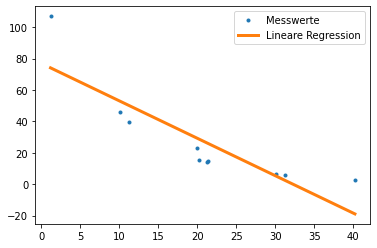

In [15]:
# Fit a polynomial of degree 1, return covariance matrix
params, covariance_matrix = np.polyfit(md1[:, 0], md1[:,2] / md1[:,1] - Nulleffekt1, deg=1, cov=True)

errors = np.sqrt(np.diag(covariance_matrix))

for name, value, error in zip('ab', params, errors):
    print(f'{name} = {value:.3f} ± {error:.3f}')

x_plot = np.linspace(np.min(md1[:,0]), np.max(md1[:,0]), 1000)

plt.plot(md1[:,0], md1[:,2] / md1[:,1] - Nulleffekt1, '.', label="Messwerte")
plt.plot(
    x_plot,
    params[0] * x_plot + params[1],
    label='Lineare Regression',
    linewidth=3,
)
plt.legend(loc="best")

Plot erstellen:

In [ ]:

plt.plot(f, Uc, 'xr', markersize=6 , label = 'Messdaten', alpha=0.5)
xx = np.linspace(100, 150000, 10**4)
plt.plot(xx, g(xx, a), '-b', linewidth = 1, label = 'Ausgleichsfunktion')

plt.xlabel(r'$f \, / \, \mathrm{Hz}$')
plt.ylabel(r'$A(\omega) \, / \, U_0$')
plt.xscale('log')                       # axis scale 
plt.legend(loc="best")                  # legend position
plt.grid(True)                          # grid style
plt.xlim(200, 150000)                   # limitation of visible scale in plot

Fehler berechnen

In [ ]:
N = ufloat(960, 31)     # Zählrate Nullmessung
print('Aktivität: ', noms(N) / 900 , stds(N / 900))

Aktivität:  1.0666666666666667 0.034444444444444444
